# Forecasting

In this assignment, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

Learning Objectives:

- Decompose time series into autocorrelation, seasonality, trend, and noise. 
- Explain the effects of exponential smoothing models and differentiate them from other models.
- Apply and evaluate the results of an autoregressive model. 
- Apply and evaluate the results of a moving average model. 
- Apply and evaluate the results of an autoregressive integrated moving average model.
- Apply and evaluate the results of ARIMA model for forecasting (time series prediction).


In [1]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

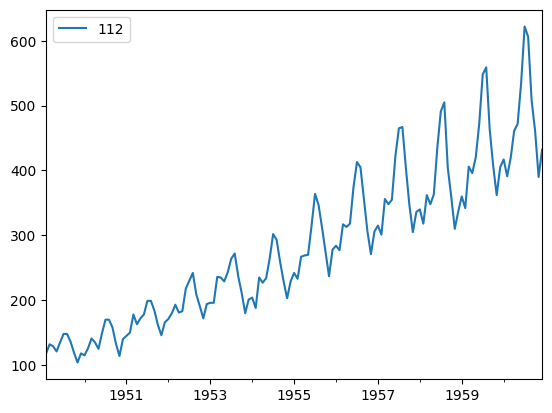

In [3]:
df = pd.read_csv('./airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

Question 1.1: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

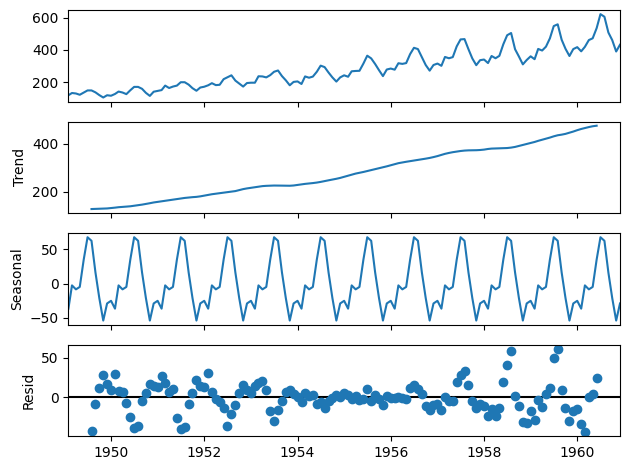

In [4]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# using seasonal_decoposition to decompose the time series into trend, seasonal and residual
result = seasonal_decompose(df, model='additive', period=12)
result.plot()
pyplot.show()

Question 1.2: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

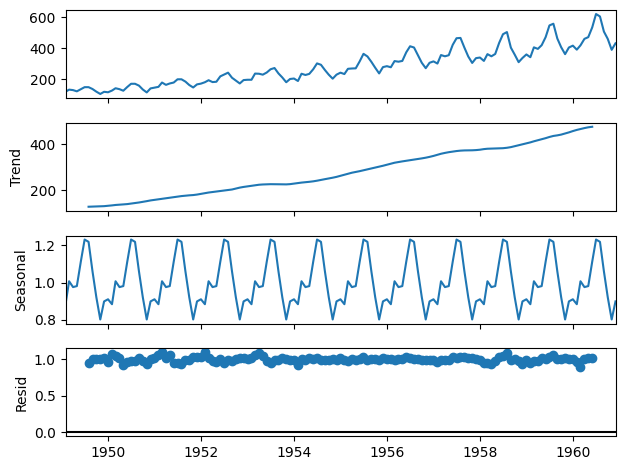

In [5]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# using seasonal_decoposition, apply multiplicative decomposition to the passenger data
result = seasonal_decompose(df, model='multiplicative', period=12)
result.plot()
pyplot.show()

----------

Question 2.1: Apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

Optimal Smoothing Level: 0.21
Optimal Smoothing Level by MAE metric: 0.21
Min RMSE: 83.76
Min MAE: 60.06


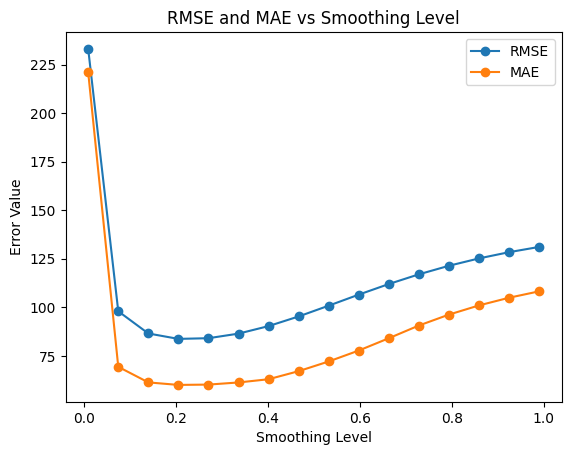

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np


# Set the range of smoothing levels
smoothing_levels = np.linspace(0.01, 0.99, num=16)
#smoothing_levels = np.arange(0.0, 1.1, 0.05)

# Initialize an empty list to store RMSE values
rmse_values = []
mae_values = []

# Loop through each smoothing level
for smoothing_level in smoothing_levels:
    model = SimpleExpSmoothing(endog=train)
    fitted_model = model.fit(smoothing_level=smoothing_level, optimized=False) # Added optimized=False because of warnings

    # Make predictions
    predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, predictions))

    # calculate the MAE
    mae = mean_absolute_error(test, predictions)
    
    # Append RMSE & MAE to the lists
    rmse_values.append(rmse)
    mae_values.append(mae)

# Find the smoothing level with the lowest RMSE
optimal_smoothing_level = smoothing_levels[np.argmin(rmse_values)]
optimal_smoothing_level_mae = smoothing_levels[np.argmin(mae_values)]
print(f"Optimal Smoothing Level: {optimal_smoothing_level:.2f}")
print(f"Optimal Smoothing Level by MAE metric: {optimal_smoothing_level_mae:.2f}")
print(f"Min RMSE: {min(rmse_values):.2f}")
print(f"Min MAE: {min(mae_values):.2f}")


# Set labels and title
plt.xlabel('Smoothing Level')
plt.ylabel('Error')
plt.title('RMSE and MAE vs Smoothing Level')
# Plot RMSE values
plt.plot(smoothing_levels, rmse_values, label='RMSE', marker='o')

# Plot MAE values
plt.plot(smoothing_levels, mae_values, label='MAE', marker='o')

# Set labels and title
plt.xlabel('Smoothing Level')
plt.ylabel('Error Value')
plt.title('RMSE and MAE vs Smoothing Level')
# Add legend
plt.legend()

# Show the plot
plt.show()


----------

Question 2.2: Apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

Optimal Smoothing Level: 0.25
Optimal Smoothing Level by MAE metric: 0.25
Min RMSE: 83.74
Min MAE: 60.05


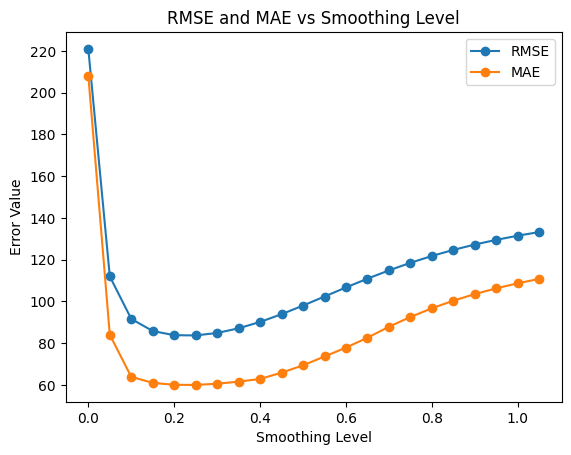

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set the range of smoothing levels
#smoothing_levels = np.linspace(0.01, 0.99, num=16)
smoothing_levels = np.arange(0.0, 1.1, 0.05)

# Initialize an empty list to store RMSE values
rmse_values = []
mae_values = []

# Loop through each smoothing level
for smoothing_level in smoothing_levels:
    #print(f"Smoothing Level: {smoothing_level:.2f}")
    model = ExponentialSmoothing(endog=train)
    fitted_model = model.fit(smoothing_level=smoothing_level)

    # Make predictions
    predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, predictions))

    # calculate the MAE
    mae = mean_absolute_error(test, predictions)
    
    # Append RMSE & MAE to the lists
    rmse_values.append(rmse)
    mae_values.append(mae)

# Find the smoothing level with the lowest RMSE
optimal_smoothing_level = smoothing_levels[np.argmin(rmse_values)]
optimal_smoothing_level_mae = smoothing_levels[np.argmin(mae_values)]
print(f"Optimal Smoothing Level: {optimal_smoothing_level:.2f}")
print(f"Optimal Smoothing Level by MAE metric: {optimal_smoothing_level_mae:.2f}")
print(f"Min RMSE: {min(rmse_values):.2f}")
print(f"Min MAE: {min(mae_values):.2f}")

# Graph the results with different smoothing levels
plt.xlabel('Smoothing Level')
plt.ylabel('Error')
plt.title('RMSE and MAE vs Smoothing Level')
# Plot RMSE values
plt.plot(smoothing_levels, rmse_values, label='RMSE', marker='o')

# Plot MAE values
plt.plot(smoothing_levels, mae_values, label='MAE', marker='o')

# Set labels and title
plt.xlabel('Smoothing Level')
plt.ylabel('Error Value')
plt.title('RMSE and MAE vs Smoothing Level')
# Add legend
plt.legend()

# Show the plot
plt.show()

-----

Question 3.1: Apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

Optimal Lag: 14.00
Optimal Lag by MAE metric: 14.00
Min RMSE: 13.58
Min MAE: 11.13


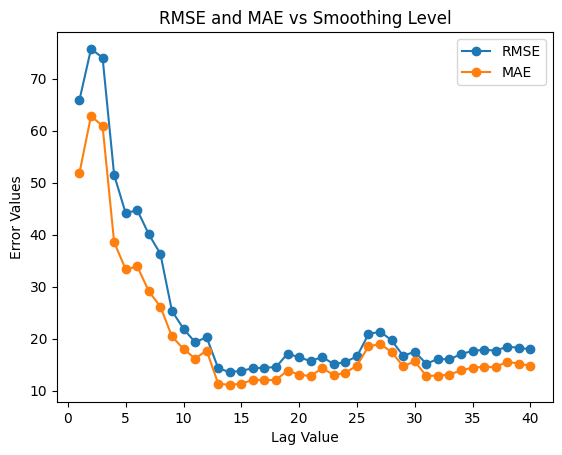

In [8]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
from sklearn.metrics import mean_absolute_error

# Simply by unsetting seasonal I noticed that the model performs poorly
# The hyper-parameter I thought would make sense to tune is lags

lags_range = range(1, 41)
# Initialize an empty list to store RMSE values
rmse_values = []
mae_values = []

for lags in lags_range:
# fit model
    model = AutoReg(train, lags=lags, seasonal=True, period=12)
    fitted_model = model.fit()

    # make prediction
    predictions = fitted_model.predict(start=test.index[0], end=test.index[-1])

    # calculate RMSE/MAE
    rmse_values.append(sqrt(mean_squared_error(test, predictions)))
    mae_values.append(mean_absolute_error(test, predictions))

optimal_lag = lags_range[np.argmin(rmse_values)]
optimal_lag_mae = lags_range[np.argmin(mae_values)]
print(f"Optimal Lag: {optimal_lag:.2f}")
print(f"Optimal Lag by MAE metric: {optimal_lag_mae:.2f}")
print(f"Min RMSE: {min(rmse_values):.2f}")
print(f"Min MAE: {min(mae_values):.2f}")


# Graph the results with different smoothing levels
plt.xlabel('Smoothing Level')
plt.ylabel('Error')
plt.title('RMSE and MAE vs Smoothing Level')
# Plot RMSE values
plt.plot(lags_range, rmse_values, label='RMSE', marker='o')

# Plot MAE values
plt.plot(lags_range, mae_values, label='MAE', marker='o')

# Set labels and title
plt.xlabel('Lag Value')
plt.ylabel('Error Values')
plt.title('RMSE and MAE vs Smoothing Level')
# Add legend
plt.legend()

# Show the plot
plt.show()

----------

Question 3.2: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Optimal q: 19.00
Optimal q by MAE metric: 19.00
Min RMSE: 96.28
Min MAE: 74.63


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


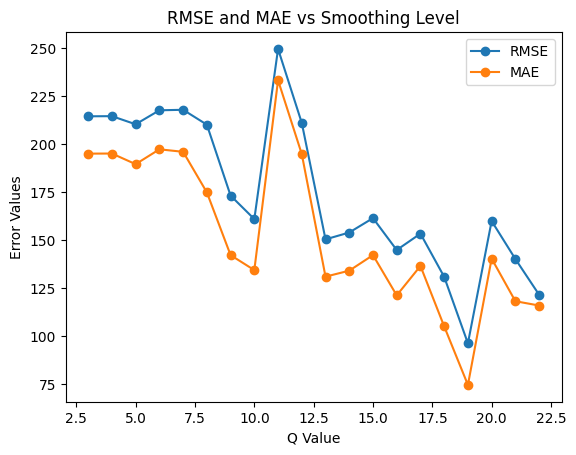

In [9]:
# MA example
# Should be using: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
# moving average models: MA(q) -> ARIMA(order(0, 0, q))
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model to the train data
# Set the values for fit (p, d, q) to (0, 0, 1)
# From the docs:
#   The (p,d,q) order of the model for the autoregressive, differences, and moving average components. 
#   d is always an integer, while p and q may either be integers or lists of integers.

q_range = range(3, 23)
# Initialize an empty list to store RMSE values
rmse_values = []
mae_values = []

for q in q_range:
    model = ARIMA(train, order=(0, 0, q)).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    # calculate RMSE/MAE
    rmse_values.append(sqrt(mean_squared_error(test, predictions)))
    mae_values.append(mean_absolute_error(test, predictions))

optimal_q = q_range[np.argmin(rmse_values)]
optimal_q_mae = q_range[np.argmin(mae_values)]
print(f"Optimal q: {optimal_q:.2f}")
print(f"Optimal q by MAE metric: {optimal_q_mae:.2f}")
print(f"Min RMSE: {min(rmse_values):.2f}")
print(f"Min MAE: {min(mae_values):.2f}")

# Graph the results with different smoothing levels
plt.xlabel('Smoothing Level')
plt.ylabel('Error')
plt.title('RMSE and MAE vs Smoothing Level')
# Plot RMSE values
plt.plot(q_range, rmse_values, label='RMSE', marker='o')

# Plot MAE values
plt.plot(q_range, mae_values, label='MAE', marker='o')

# Set labels and title
plt.xlabel('Q Value')
plt.ylabel('Error Values')
plt.title('RMSE and MAE vs Smoothing Level')
# Add legend
plt.legend()

# Show the plot
plt.show()

----------

Question 4.1: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [10]:
# MA example
# Should be using: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
# moving average models: ARMA(p, q) -> ARIMA(order(p, 0, q))
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model to the train data
# Set the values for fit (p, d, q) to (0, 0, 1)
# From the docs:
#   The (p,d,q) order of the model for the autoregressive, differences, and moving average components. 
#   d is always an integer, while p and q may either be integers or lists of integers.

# init p and q ranges and empty dicts to store RMSE and MAE values
q_range = range(13, 24); p_range = range(3, 16)
rmse_values = {}; mae_values = {}

for q in q_range:
    for p in p_range:
        model = ARIMA(train, order=(p, 0, q)).fit()
        predictions = model.predict(start=test.index[0], end=test.index[-1])

        # calculate RMSE/MAE
        rmse = sqrt(mean_squared_error(test, predictions))
        mae = mean_absolute_error(test, predictions)
        rmse_values[rmse] = (p, q)
        mae_values[mae] = (p, q)

lowest_rmse, lowest_mae = min(rmse_values), min(mae_values)
optimal_p, optimal_q = rmse_values[lowest_rmse]
optimal_p_mae, optimal_q_mae = mae_values[lowest_mae]
print(f"lowest rmse: {lowest_rmse:.2f} with p: {optimal_p}, q: {optimal_q}")
print(f"lowest mae: {lowest_mae:.2f} with p: {optimal_p_mae}, q: {optimal_q_mae}")

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

lowest rmse: 20.76 with p: 13, q: 22
lowest mae: 17.60 with p: 13, q: 22


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


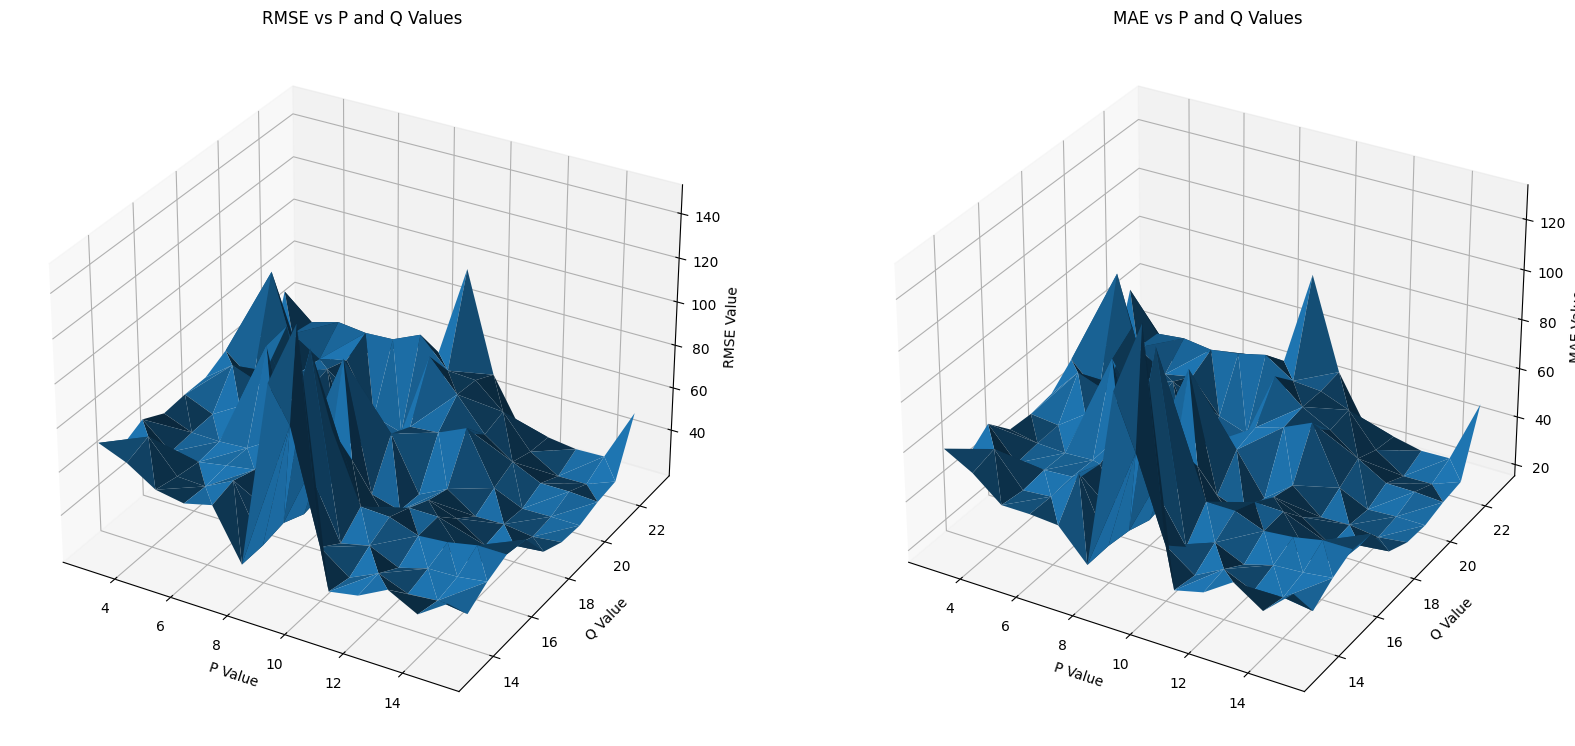

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the p, q, and rmse values from the dictionary
p1_values = [item[0] for item in rmse_values.values()]
q1_values = [item[1] for item in rmse_values.values()]
p2_values = [item[0] for item in mae_values.values()]
q2_values = [item[1] for item in mae_values.values()]
rmse_list = list(rmse_values.keys())
mae_list = list(mae_values.keys())

# From here: https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html
# set up a figure twice as wide as it is tall
#fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(20, 10))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(p1_values, q1_values, rmse_list)
ax.set_xlabel('P Value')
ax.set_ylabel('Q Value')
ax.set_zlabel('RMSE Value')
ax.set_title('RMSE vs P and Q Values')

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(p2_values, q2_values, mae_list)
ax.set_xlabel('P Value')
ax.set_ylabel('Q Value')
ax.set_zlabel('MAE Value')
ax.set_title('MAE vs P and Q Values')

# Show the plot
plt.show()

Interestingly the graphs above look almost identidal for my choices of P and Q for the ARMA model. So it probably would have sufficed to use just one of the metrics to evaluate the hyper-parameter tuning. At any rate the lowest RMSE and MAE scores were achieved from P=13 and Q=22

Question 4.2: Apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [12]:
# init p, q and d ranges and empty dicts to store RMSE and MAE values
q_range = range(13, 24); p_range = range(3, 16); d_range = range(3, 8)
rmse_values = {}; mae_values = {}

for d in d_range:
    for q in q_range:
        for p in p_range:
            try:
                model = ARIMA(train, order=(p, d, q)).fit()
                predictions = model.predict(start=test.index[0], end=test.index[-1])

                # calculate RMSE/MAE
                rmse = sqrt(mean_squared_error(test, predictions))
                mae = mean_absolute_error(test, predictions)
                rmse_values[rmse] = (p, q, d)
                mae_values[mae] = (p, q, d)
            except Exception as exception:
                print(f"Exception occurred for p: {p}, q: {q}, d: {d} - {exception}")

lowest_rmse, lowest_mae = min(rmse_values), min(mae_values)
optimal_p, optimal_q, optimal_d = rmse_values[lowest_rmse]
optimal_p_mae, optimal_q_mae, optimal_d_mae = mae_values[lowest_mae]
print(f"lowest rmse: {lowest_rmse:.2f} with p: {optimal_p}, q: {optimal_q}, d: {optimal_d}")
print(f"lowest mae: {lowest_mae:.2f} with p: {optimal_p_mae}, q: {optimal_q_mae}, d: {optimal_d_mae}")

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 7, q: 17, d: 3 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 3, q: 15, d: 4 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 3, q: 13, d: 5 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 3, q: 23, d: 5 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 3, q: 15, d: 6 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 13, q: 13, d: 7 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 3, q: 16, d: 7 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Exception occurred for p: 5, q: 16, d: 7 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

Exception occurred for p: 3, q: 18, d: 7 - LU decomposition error.


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\louis\AppData\Local\Packages

lowest rmse: 13.62 with p: 11, q: 22, d: 3
lowest mae: 11.66 with p: 13, q: 20, d: 4


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Question 5: After running through various time series models, summarize your findings. 

1. When only applying Simple Exponential smoothing Minimal losses happened quite early
   at a smoothing level 0.21

| Category                       | Value |
| ------------------------------ | ----- |
| Optimal Smoothing Level (RMSE) | 0.21  |
| Optimal Smoothing Level (RMSE) | 0.21  |
| Min RMSE                       | 83.76 |
| Min MAE                        | 60.06 |



2. When applying Exponential Smoothing 

| Category                       | Value |
| ------------------------------ | ----- |
| Optimal Smoothing Level (RMSE) | 0.25  |
| Optimal Smoothing Level (RMSE) | 0.25  |
| Min RMSE                       | 83.74 |
| Min MAE                        | 60.05 |


This is almost no difference in error rates from Simple Exponential Smoothing

3. WHen applying an Auto-regressive model to the data and varying lag value


| Category                       | Value |
| ------------------------------ | ----- |
| Optimal Lag (RMSE)             | 14.00 |
| Optimal Smoothing Level (RMSE) | 14.00 |
| Min RMSE                       | 13.58 |
| Min MAE                        | 11.13 |

Quite a large drop in the error rates!

4. When applying a simple moving average (varying only q-value in ARIMA)

| Category                       | Value |
| ------------------------------ | ----- |
| Optimal q (RMSE)               | 19.00 |
| Optimal q (RMSE)               | 19.00 |
| Min RMSE                       | 96.28 |
| Min MAE                        | 74.63 |


Actually ARIMA(q) is the worst performance so far!

5. When applying a simple moving average (varying p-value and q-value in ARIMA)

| Category                       | Value  |
| ------------------------------ | -----  |
| Optimal p, q (RMSE)            | 13, 22 |
| Optimal p, q (RMSE)            | 13, 22 |
| Min RMSE                       | 20.76  |
| Min MAE                        | 17.60  |

This performance is getting closer to the performance achieved with AutoReg but cost 3m 42s execution time


6. Finally when applying moving average and varying p-value, q-value and d-value in ARIMA

| Category                       | Value     |
| ------------------------------ | ----------|
| Optimal p, q, d (RMSE)         | 11, 22, 3 |
| Optimal p, q, d (RMSE)         | 13, 20, 4 |
| Min RMSE                       | 13.62     |
| Min MAE                        | 11.66     |


This result is very comparable with the Auto-regressive model. However in order to find the optimal values
for p, q and d I needed to execute the model 715 times for a toal time of 25m 55.4s
Compared to just running the Autoregressive model just 40 times for total compute time of 0.3s I would say Auto Regressive model performed best in terms of error rate and computational expense.

Question 6. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

Based on the observations I made in Question 6, it seems like Auto-regressive time series models would work best for this type of data. The Auto-regressive model gave the lowest MAE and RMSE scores at a very low computational cost. Based on this experience I think I would choose an AR model as the first thing to try if I am trying to predict seasonal time series data. I have heard some good things about XGBoost for time series forecasting. I would like to know how XGBoost compares with Autoreg from the statsmodels library